In [1]:
#This program uses an artifical recurrent neural network called long short ternm memory (LSTM)

In [1]:
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

Using TensorFlow backend.


In [111]:
df = web.DataReader("YESBANK.ns", "yahoo", start = "2012-01-01", end = "2020-03-10")

In [112]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,48.509998,46.099998,48.000000,46.369999,16278750.0,31.961287
2012-01-03,49.380001,46.599998,47.200001,49.180000,21337225.0,33.898132
2012-01-04,51.000000,47.610001,49.980000,48.209999,19977935.0,33.229534
2012-01-05,49.820000,47.639999,48.200001,49.570000,16636020.0,34.166943
2012-01-06,50.549999,48.500000,49.000000,49.959999,16571055.0,34.435757
2012-01-09,50.480000,48.849998,50.400002,49.799999,16560130.0,34.325474
2012-01-10,53.099998,50.000000,50.000000,52.860001,16994660.0,36.434628
2012-01-11,54.700001,52.570000,52.750000,54.459999,17791780.0,37.537449
2012-01-12,56.700001,53.700001,54.459999,56.119999,17364820.0,38.681637


In [113]:
df.shape

(2013, 6)

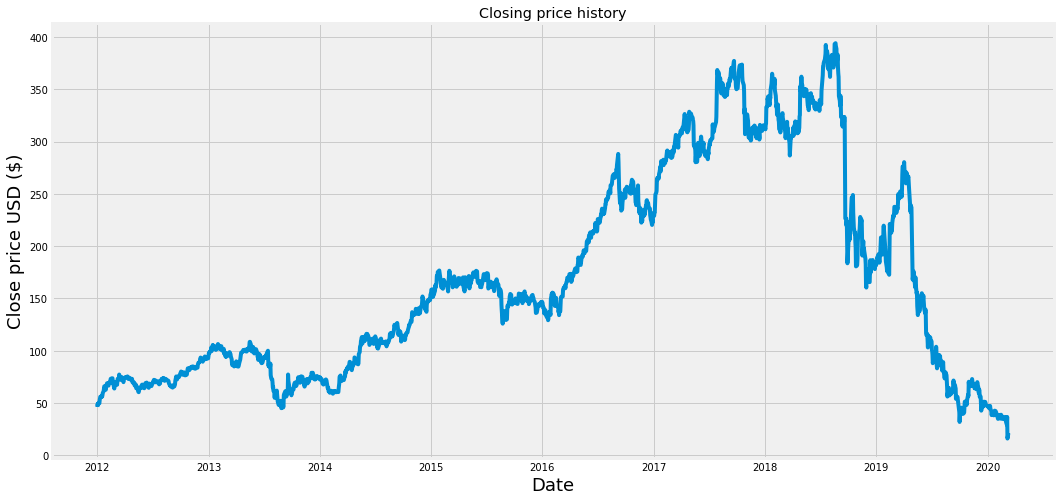

In [114]:
#visualising closing price
plt.figure(figsize=(16,8))
plt.title("Closing price history")
plt.plot(df["Close"])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Close price USD ($)", fontsize= 18)
plt.show()

In [115]:
data = df.filter(["Close"])

In [116]:
dataset = data.values


In [117]:
training_data_len = math.ceil(len(dataset) * .8 )

In [118]:
training_data_len

1611

In [119]:
#scailing data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [120]:
scaled_data

array([[0.07997883],
       [0.08741564],
       [0.08484848],
       ...,
       [0.05465132],
       [0.        ],
       [0.01349742]])

In [121]:
#creat the trainijng data set 
# create the scaled triaNING data set
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_ train data set
x_train = []
y_train = []


for i in range(60 ,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
    if i <= 62 :
        print(x_train)
        print(y_train)
        print()

[array([0.07997883, 0.08741564, 0.08484848, 0.0884478 , 0.08947995,
       0.0890565 , 0.09715496, 0.10138944, 0.10578272, 0.10588858,
       0.10562393, 0.10827048, 0.10602091, 0.1093291 , 0.1149398 ,
       0.12004763, 0.12631997, 0.13208945, 0.12981341, 0.12332936,
       0.13216884, 0.13518593, 0.13669446, 0.13973798, 0.1403467 ,
       0.13595341, 0.13375679, 0.14039962, 0.14135238, 0.14211989,
       0.14672488, 0.15090644, 0.15164747, 0.14998015, 0.15244145,
       0.14024084, 0.14442239, 0.13709143, 0.12650523, 0.14217283,
       0.1401085 , 0.13722377, 0.14275505, 0.13706498, 0.13846765,
       0.13605928, 0.15111817, 0.1502448 , 0.15233558, 0.16183672,
       0.1558555 , 0.1518592 , 0.14831283, 0.15095938, 0.15540559,
       0.15138282, 0.15418818, 0.14683075, 0.14484583, 0.14259627])]
[0.14892152572080453]

[array([0.07997883, 0.08741564, 0.08484848, 0.0884478 , 0.08947995,
       0.0890565 , 0.09715496, 0.10138944, 0.10578272, 0.10588858,
       0.10562393, 0.10827048, 0.10

In [122]:
#convert the x_train and y_train into numpy array 
x_train , y_train = np.array(x_train), np.array(y_train)
y_train.shape

(1551,)

In [123]:
#reshape the data as LSTM take 3d data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [124]:
x_train.shape

(1551, 60, 1)

In [125]:
#Build teh LSTM model 
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape =(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [126]:
#compile the model 
model.compile(optimizer="adam",loss="mean_squared_error")


In [127]:
model.fit(x_train,y_train,batch_size=1, epochs=3)

Epoch 1/3
1551/1551 [==============================] - 127s 82ms/step - loss: 0.0020
Epoch 2/3
1551/1551 [==============================] - 122s 79ms/step - loss: 8.8288e-04
Epoch 3/3
1551/1551 [==============================] - 121s 78ms/step - loss: 6.0302e-04


In [128]:
#creating test datasetest
#creating a new array containing scaled values from index 1590 to 2062
test_data = scaled_data[training_data_len -60:,:]
#create thw datasets x-test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [129]:
#convert the data to a numpy array
x_test = np.array(x_test)
x_test

array([[0.77385203, 0.78576151, 0.8147413 , ..., 0.94071723, 0.94918615,
        0.95236205],
       [0.78576151, 0.8147413 , 0.81804949, ..., 0.94918615, 0.95236205,
        0.95897843],
       [0.8147413 , 0.81804949, 0.88990338, ..., 0.95236205, 0.95897843,
        0.96506547],
       ...,
       [0.09104142, 0.07053063, 0.07727934, ..., 0.04075691, 0.03983062,
        0.03480217],
       [0.07053063, 0.07727934, 0.08071987, ..., 0.03983062, 0.03480217,
        0.05465132],
       [0.07727934, 0.08071987, 0.08111684, ..., 0.03480217, 0.05465132,
        0.        ]])

In [130]:
#reshape the data for LSTM model 
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test

array([[[0.77385203],
        [0.78576151],
        [0.8147413 ],
        ...,
        [0.94071723],
        [0.94918615],
        [0.95236205]],

       [[0.78576151],
        [0.8147413 ],
        [0.81804949],
        ...,
        [0.94918615],
        [0.95236205],
        [0.95897843]],

       [[0.8147413 ],
        [0.81804949],
        [0.88990338],
        ...,
        [0.95236205],
        [0.95897843],
        [0.96506547]],

       ...,

       [[0.09104142],
        [0.07053063],
        [0.07727934],
        ...,
        [0.04075691],
        [0.03983062],
        [0.03480217]],

       [[0.07053063],
        [0.07727934],
        [0.08071987],
        ...,
        [0.03983062],
        [0.03480217],
        [0.05465132]],

       [[0.07727934],
        [0.08071987],
        [0.08111684],
        ...,
        [0.03480217],
        [0.05465132],
        [0.        ]]])

In [131]:
x_test.shape

(402, 60, 1)

In [132]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[364.12326 ],
       [365.85745 ],
       [367.4713  ],
       [369.35065 ],
       [373.43616 ],
       [374.74503 ],
       [375.02298 ],
       [374.18207 ],
       [372.91022 ],
       [367.7603  ],
       [363.66208 ],
       [361.0545  ],
       [359.45367 ],
       [358.1772  ],
       [356.29315 ],
       [358.68277 ],
       [362.8802  ],
       [367.42285 ],
       [370.85138 ],
       [372.18198 ],
       [372.9779  ],
       [369.25546 ],
       [369.4705  ],
       [369.0982  ],
       [373.59543 ],
       [377.9665  ],
       [380.0048  ],
       [379.82217 ],
       [374.3674  ],
       [372.3589  ],
       [367.74704 ],
       [362.52496 ],
       [357.9373  ],
       [349.39764 ],
       [341.60422 ],
       [335.1378  ],
       [334.40042 ],
       [334.10468 ],
       [329.3562  ],
       [325.2248  ],
       [320.34833 ],
       [316.18896 ],
       [316.25607 ],
       [316.0296  ],
       [317.40063 ],
       [317.34634 ],
       [289.03284 ],
       [262.7

In [133]:
#get the root mean squared error (RMSE) this is for evaluating model
rmse = np.sqrt(np.mean(predictions- y_test)** 2)
rmse

0.6834623422195663

In [134]:
#plot the data
train = data[:training_data_len]
valid= data[training_data_len:]
valid["predictions"] = predictions

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


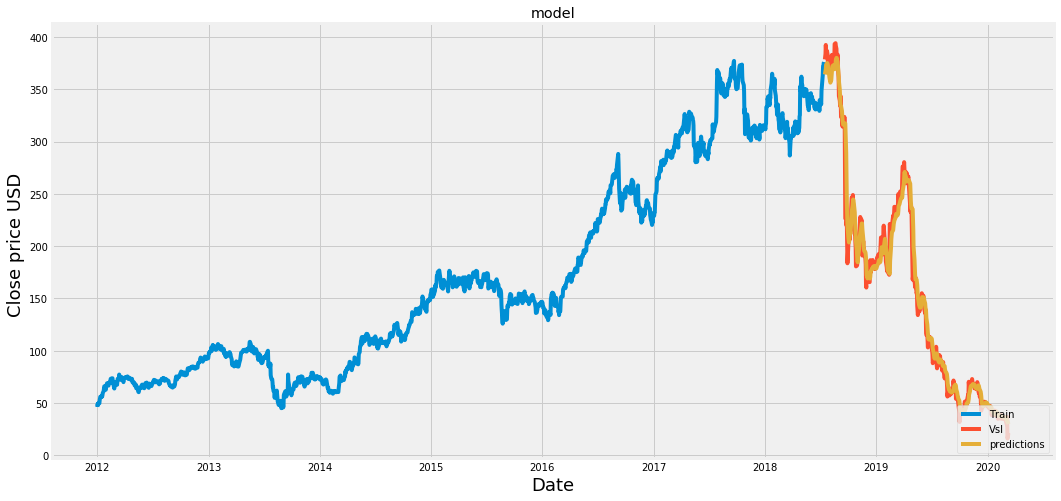

In [135]:
#visualise the data
plt.figure(figsize=(16,8))
plt.title("model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close price USD ", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "predictions"]])
plt.legend(["Train","Vsl", "predictions"],loc= "lower right")
plt.show()

In [136]:
#show the valid and predicte price
valid

,Close,predictions
Date,,
2018-07-16,378.500000,364.123260
2018-07-17,380.799988,365.857452
2018-07-18,383.649994,367.471313
2018-07-19,392.299988,369.350647
2018-07-20,386.500000,373.436157
2018-07-23,386.600006,374.745026
2018-07-24,384.350006,375.022980
2018-07-25,382.899994,374.182068
2018-07-26,369.750000,372.910217


In [137]:
# from sklearn import metrics
# print("Accuracy:",metrics.accuracy_score(y_test, predictions))

In [140]:
#get the quote
apple_quote = web.DataReader("SBIN.ns", "yahoo", start = "2012-01-01", end = "2020-03-18")
new_df = apple_quote.filter(["Close"])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
x_test = []
#append the past 60 days 
x_test.append(last_60_days_scaled)
#convert the x_test into numpy aRRAY
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_price = model.predict(x_test)
pred_price =scaler.inverse_transform(pred_price)
print(pred_price)

[[219.36858]]


In [141]:
apple_quote2 = web.DataReader("SBIN.ns", "yahoo", start = "2020-03-18", end = "2020-03-18")
apple_quote2["Close"]

Date
2020-03-18    205.050003
Name: Close, dtype: float64